# Векторный потенциал прецессирующего магнитного диполя

Предыстория вопроса состоит в том, что в работе 

https://nbviewer.org/github/daju1/articles/blob/master/electrostatic_vector_potential/Vector_potential_of_the_electrostatic_field_of_a_point_charge.ipynb

мне удалось записать векторный потенциал для кулоновского поля точечного электрического заряда. Таким образом формула для векторного потенциала кулоновского заряда получена и проверка показала, что операция ротора примененная к этому векторнному потенциалу дает кулоновское электрическое поле точечного заряда.

Полученный векторный потенциал по своей форме весьма интересный. Его вид как будто показал, что существование электростатического заряда не возможно без выделенной оси вращения.

Поэтому в настоящей работе я задаюсь следующим вопросом: может ли векторный потенциал кулоновского поля электрона создаваться, например, с помощью прецессии дипольного момента магнетона Бора?

Таким образом я рассматриваю далее следующую задачу: имеется магнитный диполь с двумя противоположно заряженными магнитными полюсами, который прецессирует вокруг оси проходящей через центр магнитного диполя. Более наглядно моделируемая в данной работе структура нарисована здесь

https://nbviewer.org/github/daju1/articles/blob/master/electrostatic_vector_potential/Structure_of_electron.ipynb


Таким образом создаётся симметричная пара кольцевых магнитных токов, которые текут во взаимно противоположных направлениях (потому как движение по окружности в одном и том же направлении, например по часовой стрелке, пары магнитных зарядов, имеющих противоположные знаки создает пару взаимно противоположных по направлению кольцевых магнитных токов).

Для решения этой задачи в литературе был найден алгоритм расчета векторного потенциала для кольцевого тока, который сводится к эллиптическим интегралам. Таким образом трехмерное интегрирование сводится к двумерному.

Однако работа в цилиндрической системе координат для целей настоящей работы оказалась неудобной. Потому что в цилиндрических координатах интегральное уравнение Фредгольма первого рода не удалось привести к интегральному уравнению Фредгольма второго рода.

https://nbviewer.org/github/daju1/articles/blob/master/electrostatic_vector_potential/Vector_potential_of_a_precessing_magnetic_dipole.ipynb

Поэтому в данной работе решается задача расчёта векторного потенциала кольцевого тока в сферической системе координат с последующим решением интегрального уравнения Фредгольма.

Поскольку я рассматриваю не точечный магнитный заряд в составе прецессирующего диполя магнетона Бора, а распределенный в пространстве магнитный заряд, то в подынтегральном выражении моего интегрального уравнения есть два множителя: неизвестная функция плотности распределения магнитных токов в пространстве и так называемое ядро (или оператор) моего интегрального уравнения.

Интегральное уравнение решается методом итераций. Из-за вычислительных сложностей многоитерационного интегирования в данной работе представлен результат лишь нулевого приближения неизвестной функции распределения магнитных токов прецессирующего магнетона Бора в пространстве.

In [1]:
from IPython.display import display, Math, Latex

def disp(ex):
    display(Math(latex(ex)))
    
def displ(tex):
    display(Math(tex))

In [2]:
theta_m = var("theta_m")
theta_a = var("theta_a")
#assume (theta_a, "real")
r_m = var("r_m")
r_a = var("r_a")

assume(r_m>0)
assume(r_a>0)

# Векторный потенциал электростатического поля точечного заряда

https://nbviewer.org/github/daju1/articles/blob/master/electrostatic_vector_potential/Vector_potential_of_the_electrostatic_field_of_a_point_charge.ipynb

в цилиндрической системе координат

$$\vec A = -\frac{ z}{{\rho}\sqrt{\rho^{2} + z^{2}} }\,{\vec {e}}_{\varphi }$$

в сферической системе координат

$$\vec A = -\frac{сtg \, \theta}{r}\,{\vec {e}}_{\varphi }$$

In [3]:
A_q = lambda ra, theta_a : cot(theta_a) / (ra)

# уравнение для векторного потенциала прецессирующего магнитного диполя

Итак, для ответа на вопрос может ли векторный потенциал кулоновского поля электрона создаваться, например, с помощью прецессии дипольного момента магнетона Бора? - рассмотрим следующую задачу.

Имеется магнитный диполь с двумя противоположно заряженными магнитными полюсами, который прецессирует вокруг оси проходящей через центр магнитного диполя. Таким образом создаётся симметричная пара кольцевых магнитных токов, которые текут во взаимно противоположных направлениях (потому как движение по окружности в одном и том же направлении, например по часовой стрелке, пары магнитных зарядов, имеющих противоположные знаки создает пару взаимно противоположных по направлению кольцевых магнитных токов).

Составим теперь уравнение векторного потенциала прецессирующего магнитного диполя на основе данных об объемном распределении магнитных токов.


в цилиндрической системе координат

$\rho_a$, $z_a$ - координаты наблюдения

$\rho_m$, $z_m$, $\varphi_m$ - координаты интегрирования, координаты магнитных зарядов

$A_{\varphi} = \int\limits_{z_m=-\infty}^{\infty}\,\,\int\limits_{\rho_m=0}^{\infty}\frac{j_m(\rho_m, z_m) }{c} \left(\int\limits_{\varphi_m=0}^{2\pi}\frac{cos\,{\varphi_m }\,\rho_m \, d \varphi_m}{R}\right)d \rho_m \, d z_m$

Неизвестные функции

$q_m(r_m, \theta_m)$ - плотность магнитного заряда в зависимости от цилиндрических координат

$\omega_m (r_m, \theta_m)$ - круговая частота вращения

$j_m(r_m, \theta_m) = q_m(r_m, \theta_m)\, \omega_m (r_m, \theta_m)$ - плотность магнитного тока

<p>Если заданы сферические координаты точки, то переход к цилиндрическим осуществляется по формулам:
</p>

${\displaystyle {\begin{cases}\rho =r\sin \theta ,\\\varphi =\varphi ,\\z=r\cos \theta .\end{cases}}}$

<p>Обратно от цилиндрических к сферическим:
</p>

${\displaystyle {\begin{cases}r={\sqrt {\rho ^{2}+z^{2}}},\\\theta =\mathrm {arctg} {\dfrac {\rho }{z}},\\\varphi =\varphi .\end{cases}}}$

в сферической системе координат

$r_a$, $\theta_a$ - координаты наблюдения

$r_m$, $\theta_m$, $\varphi_m$ - координаты интегрирования, координаты магнитных зарядов

Ниже приведена имплементация алгоритма расчета векторного потенциала для кольцевого тока, который сводится к эллиптическим интегралам.

https://nbviewer.org/github/daju1/articles/blob/master/electrostatic_vector_potential/Vector_potential_of_a_precessing_magnetic_dipole.ipynb


$${{A^{*}}_E}_{\varphi} = \frac{1}{c}\int\limits_{V}^{}\frac{{j_m}_{\varphi}}{R} dV$$


Векторный потенциал кольцевого тока

$A_{\varphi} = \frac{\mu \, I}{4 \pi}\int\limits_{\varphi}^{}\frac{\rho_j \,cos\,{\varphi } \, d \varphi}{R}$

Окончательно имеем

$a = 1+\frac{\rho_a^2}{\rho_j^2}+\frac{(z_j-z_a)^2}{\rho_j^2}$, $b = 2\,\frac{\rho_a}{\rho_j}$

$m=\frac{2\,b}{a\,+\,b}$

$A_{\varphi} = \frac{\mu \, I}{4 \pi} \left(\frac{a}{b}\frac{2}{\sqrt{a+b}}\int\limits_{0}^{\pi/2}\frac{d \psi}{\sqrt{1\,-\,m\,sin^{~2} \psi }} - \frac{2\sqrt{a+b}}{b}\int\limits_{0}^{\pi/2}{\sqrt{1\,-\,m\,sin^{~2} \psi }}\, d \psi \right)$

$A_{\varphi} = \frac{\mu \, I}{4 \pi} \left(k_K\int\limits_{0}^{\pi/2}\frac{d \psi}{\sqrt{1\,-\,m\,sin^{~2} \psi }} - k_E\int\limits_{0}^{\pi/2}{\sqrt{1\,-\,m\,sin^{~2} \psi }}\, d \psi \right)$

$k_K = \frac{a}{b}\frac{2}{\sqrt{a+b}}$

$k_E = \frac{2\sqrt{a+b}}{b}$

$A_{\varphi}\left(\rho_j, \rho_a, z_j, z_a\right) = \frac{\mu \, I}{4 \pi} \left(k_K\,K(m) - k_E\,E(m) \right)$

где при принятых обозначениях

Полный нормальный эллиптический интеграл Лежандра 1-го рода

Complete elliptic integral of the first kind

class sage.functions.special.EllipticKC

Return the complete elliptic integral of the first kind:

$K(m) = \int\limits_{0}^{\pi/2}\frac{d \psi}{\sqrt{1\,-\,m\,sin^{~2} \psi }}$

sage: elliptic_kc(m)

Полный нормальный эллиптический интеграл Лежандра 2-го рода

Complete elliptic integral of the second kind

class sage.functions.special.EllipticEC

$E(m) = \int\limits_{0}^{\pi/2}{\sqrt{1\,-\,m\,sin^{~2} \psi }}\, d \psi$

sage: elliptic_ec(m)

$A_{\varphi} = \int\limits_{z_m=-\infty}^{\infty}\,\,\int\limits_{\rho_m=0}^{\infty}\frac{j_m(\rho_m, z_m) }{c} \left(\int\limits_{\varphi_m=0}^{2\pi}\frac{cos\,{\varphi_m }\,\rho_m \, d \varphi_m}{R}\right)d \rho_m \, d z_m$

$ \int\limits_{\varphi}^{}\frac{\rho_j \,cos\,{\varphi } \, d \varphi}{R} = \left(k_K\,K(m) - k_E\,E(m) \right)$

$A_{\varphi} = \int\limits_{z_m=-\infty}^{\infty}\,\,\int\limits_{\rho_m=0}^{\infty}\frac{j_m(\rho_m, z_m) }{c} \left(k_K\,K(m) - k_E\,E(m) \right)d \rho_m \, d z_m$

In [4]:
# a and b for ring
a = lambda rj, ra, zj, za : 1 + (ra/rj)^2 + ((zj-za)/rj)^2
b = lambda rj, ra : 2 * (ra/rj)
# m for ring
M = lambda rj, ra, zj, za : 2 * b (rj, ra) / (a(rj, ra, zj, za) + b(rj, ra))
# k_K and k_E for ring
k_K = lambda rj, ra, zj, za : 2 * a(rj, ra, zj, za) / b(rj, ra) / sqrt(a(rj, ra, zj, za) + b(rj, ra))
k_E = lambda rj, ra, zj, za : 2 * sqrt(a(rj, ra, zj, za) + b(rj, ra)) / b(rj, ra)
A_ring_elliptic = lambda rj, ra, zj, za : \
       + k_K(rj, ra, zj, za) * elliptic_kc(M(rj, ra, zj, za)) \
       - k_E(rj, ra, zj, za) * elliptic_ec(M(rj, ra, zj, za))

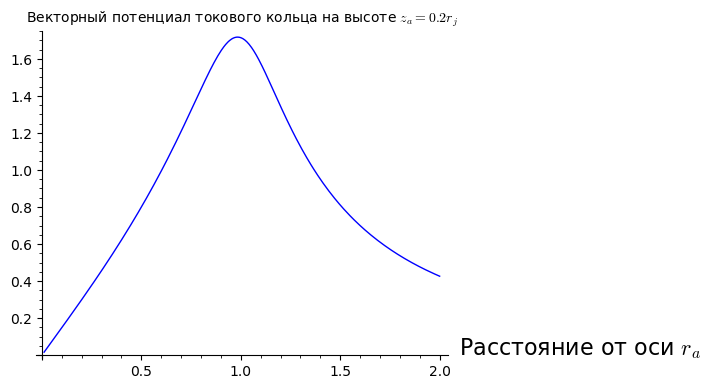

In [5]:
p = plot(A_ring_elliptic(
    rj = 1, ra = r_a, 
    zj = 0, za = 0.2),
         (r_a, 0, 2))
p.show(title="Векторный потенциал токового кольца на высоте $z_a=0.2r_j$",
       axes_labels=["Расстояние от оси $r_a$", ""])

$A_{\varphi} \left(r_a, z_a\right) = \int\limits_{z_m=-\infty}^{\infty}\,\,\int\limits_{\rho_m=0}^{\infty}\frac{j_m(\rho_j, z_j) }{c} A\_ring\_elliptic(\rho_j, \rho_a, z_j, z_a)\, d \rho_j \, d z_j$

Производим инициализацию неизвестной функции магнитных токов для подстановки в уравнение 

$${{A^{*}}_E}_{\varphi} = \frac{1}{c}\int\limits_{V}^{}\frac{{j_m}_{\varphi}}{R} dV$$

Ряд экспериментов показал целесообразность инициализации угловой части магнитного тока в виде

$${{j_m}_{\varphi}}  = {{\rho_m}} \cdot {{\omega_m}} \sim \frac{cos(\theta_m)^{2k+1}}{r^{3}}, k = 0,1,2,... $$

where ${{j_m}_{\varphi}}$ is density of magnetic current

$${{\rho_m}} \sim \frac{cos(\theta_m)^{2k+1}}{r^{2}} $$

where ${{\rho_m}}$ is density of magnetic charge and

$${{\omega_m}} \sim \frac{1}{r} $$

is angular frequency of magnetic charge

Таким образом сохраняется условие нормируемости плотности магнитных зарядов благодаря их убыванию пропорционально $1/r^2$ а так же, вероятно, можно избежать проблемы превышения магнитными зарядами скорости света на больших $r$ благодаря тому что частота вращения магнитных зарядов спадает как $1/r$

In [6]:
# инициализируем неизвестную функцию распределения
# плотности магнитного тока в объёме
# прецессирующего магнитного диполя как

# J_theta = lambda theta_m : cot(theta_m)
# J_theta = lambda theta_m : cos(theta_m)/sin(theta_m)
# J_theta = lambda theta_m : cos(theta_m)
J_theta   = lambda theta_m : cos(theta_m)^9
rho_theta = lambda theta_m : cos(theta_m)^9
# J_r = lambda r_m : 1 / r_m^(3/2)
# J_r = lambda r_m : 1 / r_m^(2)
J_r   = lambda r_m : 1 / r_m^(3)
rho_r = lambda r_m : 1 / r_m^(2)

# J_r = lambda r_m : 1.1 / r_m^(3/2) + 0.15 / r_m^2

# J_r = lambda r_m : exp(-r_m^(2))

In [7]:
j1_spherical = lambda r_m, theta_m : J_r(r_m) * J_theta(theta_m)

In [8]:
j1_cylindrical = lambda rho, z : \
    j1_spherical(r_m = sqrt(rho^2+z^2),
                 theta_m = atan2(rho, z))

$A_{\varphi} \left(r_a, z_a\right) = \int\limits_{z_m=-\infty}^{\infty}\,\,\int\limits_{\rho_m=0}^{\infty}\frac{j_m(\rho_j, z_j) }{c} A\_ring\_elliptic(\rho_j, \rho_a, z_j, z_a)\, d \rho_j \, d z_j$

In [9]:
cA_integrand = lambda rho_a, z_a, rho_j, z_j : \
    j1_cylindrical(rho_j, z_j) * A_ring_elliptic(
    rj = rho_j, ra = rho_a, 
    zj = z_j, za = z_a)

In [10]:
var("rho_a, z_a")
var("rho_j, z_j")
var("z_c")

z_c

In [11]:
disp(cA_integrand(rho_a, z_a, rho_j, z_j))

<IPython.core.display.Math object>

In [20]:
cA_integrand(rho_a, z_a, rho_j, z_j).variables()

(rho_a, rho_j, z_a, z_j)

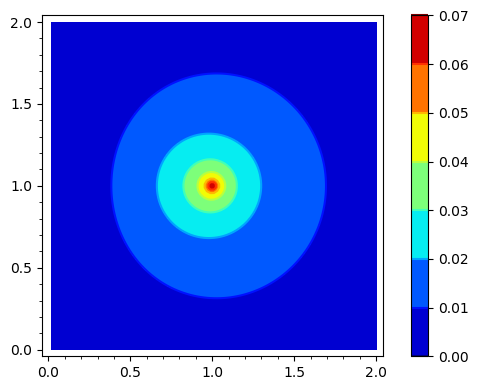

In [22]:
contour_plot(cA_integrand(rho_a, z_a, rho_j = 1, z_j = 1),
             (rho_a, 0, 2), (z_a, 0, 2),
             cmap="jet", colorbar=True).show()

In [12]:
from scipy import integrate as scipy_integrate

In [13]:
cA_int_zj = lambda rho_a, z_a, rho_j, zj1, zj2: \
    scipy_integrate.quad( \
        lambda z_j : cA_integrand(rho_a, z_a, rho_j, z_j), zj1, zj2)[0]

In [26]:
cA_int_z_j = lambda rho_a, z_a, rho_j, zj1, zj2: \
    cA_integrand(rho_a, z_a, rho_j, z_j).integrate(z_j, zj1, zj2,
                                                   algorithm="sympy")

In [14]:
cA_int_zj_rj = lambda rho_a, z_a, zj1, zj2, rj1, rj2: \
    scipy_integrate.quad( \
        lambda rho_j : cA_int_zj(rho_a, z_a, rho_j, zj1, zj2), rj1, rj2)[0]

In [18]:
def A1(rho_a, z_a, zj2, rj2):
    return cA_int_zj_rj(rho_a=rho_a, z_a=z_a,
                        zj1=-zj2, zj2=zj2,
                        rj1=0,    rj2=rj2)[0]

In [16]:
cA_integrand(rho_a, z_a, rho_j, z_j).variables()

(rho_a, rho_j, z_a, z_j)

In [34]:
import numpy as np
def make_A1(zj2, rj2):
    #xa_linspace = np.linspace(np.float64(-20), np.float64(+20),  40)
    #ya_linspace = np.linspace(np.float64(-20), np.float64(+80), 100)
    xa_linspace = np.linspace(np.float64(-100), np.float64(+100), 20)
    ya_linspace = np.linspace(np.float64(-100), np.float64(+300), 40)

    xa_list = xa_linspace.tolist()
    ya_list = ya_linspace.tolist()

    xa_grid,ya_grid = np.meshgrid(xa_linspace, ya_linspace)

    a_ = xa_grid * np.nan

    for ix in np.arange(0, len(xa_linspace), 1):
        for iy in np.arange(0, len(ya_linspace), 1):

            Rho = xa_list[ix]
            Z   = ya_list[iy]

            try:
                A1 = cA_int_zj_rj(rho_a=Rho, z_a=Z,
                                  zj1=-zj2, zj2=zj2,
                                  rj1=0,    rj2=rj2)
                a_[iy][ix] = A1
                # print ("Rho = ", Rho, "Z =", Z, "A1 =", A1)
            except Exception as ex:
                print (ex)
                print ("Rho = ", Rho, "Z =", Z)
                pass

    return xa_grid, ya_grid, a_

In [38]:
%time (rho_grid, z_grid, a_) = \
    make_A1(zj2 = 100, rj2 = 100)

/tmp/ipykernel_553/856598083.py:1: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  cA_int_zj = lambda rho_a, z_a, rho_j, zj1, zj2:     scipy_integrate.quad(         lambda z_j : cA_integrand(rho_a, z_a, rho_j, z_j), zj1, zj2)[Integer(0)]


CPU times: user 1h 39min 49s, sys: 5.22 s, total: 1h 39min 54s
Wall time: 1h 39min 57s


%time (rho_grid, z_grid, a_) = \
    make_A1(zj2 = 50, rj2 = 50)

In [39]:
def plot_a(rho_grid, z_grid, a, title, levels=None):
    fig,ax=plt.subplots(1,1)
    cp = ax.contourf(rho_grid, z_grid, a, levels=levels)
    fig.colorbar(cp) # Add a colorbar to a plot
    ax.set_tit2le(title)
    ax.set_xlabel('rho')
    ax.set_ylabel('z')
    ax.set_aspect(1)

In [40]:
levels = np.linspace(-0.08, 0.08, 16)
plot_a(rho_grid, z_grid, a=a_, title='$A_1$ potential',
    levels = None)

NameError: name 'plt' is not defined

# Проверка найденного решения интегрального уравнения методом подстановки в формулу для вычисления векторного потенциала

Рассмотрим формулу векторного потенциала для системы распределённых кольцевых магнитных токов

$j_m(r_m, \theta_m) = j_r(r_m) \, j_{\theta}(\theta_m) = q_r(r_m) \, q_{\theta}(\theta_m)\, \omega_{r} (r_m)\, \omega_{\theta} (\theta_m)$ - плотность магнитного тока

# Проверка найденного решения интегрального уравнения методом подстановки в формулу для вычисления скалярного магнитного кулоновского потенциала

Рассмотрим формулу скалярного магнитного кулоновского потенциала для системы распределённых кольцевых магнитных зарядов

$$\phi_m = \int\limits_{V}^{}\frac{{\rho_m}}{R} dV$$

where ${{\rho_m}}$ is density of magnetic charge

$${{\rho_m}} \sim \frac{cos(\theta_m)^{2k+1}}{r^{2}} $$

and
 
$${{\omega_m}} \sim \frac{1}{r} $$

is angular frequency of magnetic charge

$j_m(r_m, \theta_m) = j_r(r_m) \, j_{\theta}(\theta_m) = \rho_r(r_m) \, \rho_{\theta}(\theta_m)\, \omega_{r} (r_m)\, \omega_{\theta} (\theta_m)$ - плотность магнитного тока

In [ ]:
pra = 1/J_r(r_a)/r_a^2
latex_pra=latex(pra)
pra

Векторный потенциал электростатического поля точечного заряда в сферической системе координат

$${r_a} A_{\varphi} = - {сtg \, \theta_a}$$

# Потенциал взаимодействия магнитных прецессирующих диполей

Рассмотрим задачу взаимодействия двух соосно вокруг оси $z$ прецессирующих магнитных диполей в геометрии задачи, которая изображена в работе https://nbviewer.org/github/daju1/articles/blob/master/electrostatic_vector_potential/Structure_of_electron.ipynb

на втором рисунке.

Запишем выражение для потенциальной функции взаимодействия магнитного тока второй частицы с полем векторного потенциала магнитныого тока первой частицы (Тамм формула 51.10)

$U_{12} = -\frac{1}{c} \int\limits_{V_2} \vec{A_1} \vec{j_2} dV$

Запишем выражение для потенциальной функции взаимодействия магнитного заряда второй частицы с полем скалярного потенциала магнитныого заряда первой частицы (Тамм формула 15.6)

$W_{12} = \int\limits_{V_2} {\phi_1} {\rho_2} dV$

Силу взаимодействия двух прецессирующих диполей можно найти исходя из

$F = - \frac{\partial}{\partial z} \left(U_{12} + W_{12}\right)$

для осуществления данных вычислений интегрирование удобно производить в цилиндрической системе координат

$U_{12} = -\frac{1}{c} \int\limits_{z_m=-\infty}^{\infty}\,\,\int\limits_{\rho_m=0}^{\infty}\left(\int\limits_{\varphi_m=0}^{2\pi}\vec{A_1} \vec{j_2} {\,\rho_m \, d \varphi_m}\right)d \rho_m \, d z_m$

$W_{12} = \int\limits_{z_m=-\infty}^{\infty}\,\,\int\limits_{\rho_m=0}^{\infty}\left(\int\limits_{\varphi_m=0}^{2\pi}{\phi_1} {\rho_2} {\,\rho_m \, d \varphi_m}\right)d \rho_m \, d z_m$

Поскольку в рассматриваемой геометрии магнитный ток и векторный потенциал имеют ненулевыми только лишь $\varphi$ компоненту, следовательно эти векторы всюду параллельны и скалярное произведение этих векторов выражается как произведение модулей этих векторов $\vec{A_1} \vec{j_2} = {A_1}_{\varphi} {j_2}_{\varphi}$ 

$U_{12} = -\frac{1}{c} \int\limits_{z_m=-\infty}^{\infty}\,\,\int\limits_{\rho_m=0}^{\infty}\left(\int\limits_{\varphi_m=0}^{2\pi}{A_1}_{\varphi} {j_2}_{\varphi} {\,\rho_m \, d \varphi_m}\right)d \rho_m \, d z_m$

Поскольку данная геометрия задачи не зависит от $\varphi$ то интегрирование по этой переменной приводит к появлению множителя $2\pi$

$U_{12} = -\frac{{2\pi}}{c} \int\limits_{z_m=-\infty}^{\infty}\,\,\int\limits_{\rho_m=0}^{\infty}{A_1}_{\varphi} {j_2}_{\varphi} {\,\rho_m \, }d \rho_m \, d z_m$

$W_{12} = {2\pi} \int\limits_{z_m=-\infty}^{\infty}\,\,\int\limits_{\rho_m=0}^{\infty}{\phi_1} {\rho_2} {\,\rho_m \, }d \rho_m \, d z_m$

теперь в выражениях для векторного потенциала и плотности магнитного тока необходимо перейти от сферических координат к цилиндрическим. При этом частица 1 будет оставаться в начале коодинат для того чтобы не смещать достаточно сложное выражение для векторного потенциала вдоль оси $z$. Будем изменять координату $z$ частицы 2 

Исходя из выражения для векторного потенциала в сферических координатах

Переход от цилиндрических к сферическим координатам:

${\displaystyle {\begin{cases}r={\sqrt {\rho ^{2}+z^{2}}},\\\theta =\mathrm {arctg} {\dfrac {\rho }{z}},\\\varphi =\varphi .\end{cases}}}$

составляем функцию векторного потенциала и скалярного магнитного потенциала частицы 1 принимающую цилиндрические координаты и производящую переход к сферическим координатам при вызове лямбда функции A1_spherical

$A1_{cylindrical}(\rho, z) = A1_{spherical}(r_a = \sqrt{\rho^2+z^2},
                 \theta_a = atan\dfrac {\rho }{z})$

И точно так же исходя из выражения для магнитного тока в сферических координатах

In [ ]:
J_r(r_m) * J_theta(theta_m)

In [ ]:
rho_r(r_m) * rho_theta(theta_m)

In [ ]:
j2_spherical = lambda r_m, theta_m : J_r(r_m) * J_theta(theta_m)

In [ ]:
rho2_spherical = lambda r_m, theta_m : rho_r(r_m) * rho_theta(theta_m)

составляем функцию магнитного тока частицы 2 принимающую цилиндрические координаты и производящую переход к сферическим координатам при вызове лямбда функции j2_spherical, введя в эту функцию третим параметром координату центра частицы 2

$j2_{cylindrical}(\rho, z, z_c) = j2_{spherical}(r_a = \sqrt{\rho^2+(z-z_c)^2},
                 \theta_a = atan\dfrac {\rho }{z - z_c})$

In [ ]:
j2_cylindrical = lambda rho, z, z_c : \
    j2_spherical(r_m = sqrt(rho^2+(z-z_c)^2),
                 theta_m = atan2(rho, z-z_c))

In [ ]:
rho2_cylindrical = lambda rho, z, z_c : \
    rho2_spherical(r_m = sqrt(rho^2+(z-z_c)^2),
                 theta_m = atan2(rho, z-z_c))

In [ ]:
var("rho, z, z_c")
assume(rho > 0)
disp(j2_cylindrical(rho, z, z_c))
disp(rho2_cylindrical(rho, z, z_c))

disp(A1_cylindrical(rho, z))

Теперь можем записать подыитегральное выражение в интеграле подынтеграьной функции

In [ ]:
U_12_integrand = lambda rho, z, z_c, zj2, rj2: \
    -2*pi*rho * A1(rho, z, zj2, rj2) * j2_cylindrical(rho, z, z_c)

Теперь можно изобразить поле интегранда графически и за одно численно просуммировать это поле

In [ ]:
import numpy as np
def make_U(zc_cur, zj2, rj2):
    #xa_linspace = np.linspace(np.float64(-20), np.float64(+20),  40)
    #ya_linspace = np.linspace(np.float64(-20), np.float64(+80), 100)
    xa_linspace = np.linspace(np.float64(-100), np.float64(+100), 20)
    ya_linspace = np.linspace(np.float64(-100), np.float64(+300), 40)

    xa_list = xa_linspace.tolist()
    ya_list = ya_linspace.tolist()

    xa_grid,ya_grid = np.meshgrid(xa_linspace, ya_linspace)

    u_ = xa_grid * np.nan

    sum_u = 0

    for ix in np.arange(0, len(xa_linspace), 1):
        for iy in np.arange(0, len(ya_linspace), 1):

            Rho = xa_list[ix]
            Z   = ya_list[iy]

            try:
                U = U_12_integrand(rho=Rho, z=Z, z_c=zc_cur,
                                   zj2=zj2, rj2=rj2).n()
                u_[iy][ix] = U
                sum_u += U
                #print ("Rho = ", Rho, "Z =", Z, "U =", U)
            except Exception as ex:
                print (ex)
                print ("Rho = ", Rho, "Z =", Z, "z_c =", zc_cur)
                pass

    return xa_grid, ya_grid, u_, sum_u

In [ ]:
%time (rho_grid, z_grid, u_, sum_u) = \
    make_U(zc_cur = 20, zj2=100, rj2=100)

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def contour_plot_u(fig, ax, i, rho_grid, z_grid, u, title, levels=None):
    cp = ax[i].contourf(rho_grid, z_grid, u, levels=levels)
    #fig.colorbar(cp) # Add a colorbar to a plot
    ax[i].set_title(title)
    ax[i].set_xlabel('rho')
    ax[i].set_ylabel('z')
    ax[i].set_aspect(1)

In [ ]:
def plot_u(rho_grid, z_grid, u, title, levels=None):
    fig,ax=plt.subplots(1,1)
    cp = ax.contourf(rho_grid, z_grid, u, levels=levels)
    fig.colorbar(cp) # Add a colorbar to a plot
    ax.set_title(title)
    ax.set_xlabel('rho')
    ax.set_ylabel('z')
    ax.set_aspect(1)

In [ ]:
def plot_surf_u(rho_grid, z_grid, u, title):
    ax = plt.axes(projection='3d')
    ax.set_xlabel('z (cm)')
    ax.set_ylabel('r (cm)')
    ax.plot_surface(rho_grid, z_grid, u, cmap='viridis', edgecolor='none')
    ax.set_title(title)
    plt.show()

In [ ]:
levels = np.linspace(-0.0008, 0.0008, 16)
plot_u(rho_grid, z_grid, u=u_, title='Precessing magnets potential',
    levels = levels)

In [ ]:
plot_surf_u(rho_grid, z_grid, u=u_, title='Precessing magnets potential')

In [ ]:
levels = np.linspace(-0.08, 0.08, 16)
plot_u(rho_grid, z_grid, u=w_, title='Scalar magnets potential',
    levels = levels)

In [ ]:
plot_surf_u(rho_grid, z_grid, u=w_, title='Scalar magnets potential')

А теперь изобразим тоже самое при разных значениях координаты частицы 2

In [ ]:
plot_data_sum_U = []
plot_data_sum_Uzc1 = []
plot_data_sum_Uzc2 = []
plot_data_sum_Uzc3 = []

plot_data_sum_W = []
plot_data_sum_Wzc1 = []
plot_data_sum_Wzc2 = []
plot_data_sum_Wzc3 = []

for zc in np.arange(10, 70, 10):
    (rho_grid, z_grid, u_, w_, sum_u, sum_w) = make_U(zc_cur = zc)
    # print (zc, sum_u)
    plot_data_sum_U += [(zc, sum_u)]
    plot_data_sum_Uzc1 += [(zc, sum_u * zc)]
    plot_data_sum_Uzc2 += [(zc, sum_u * zc^2)]
    plot_data_sum_Uzc3 += [(zc, sum_u * zc^3)]

    plot_data_sum_W += [(zc, sum_w)]
    plot_data_sum_Wzc1 += [(zc, sum_w * zc)]
    plot_data_sum_Wzc2 += [(zc, sum_w * zc^2)]
    plot_data_sum_Wzc3 += [(zc, sum_w * zc^3)]

    fig_,ax_= plt.subplots(1,2)

    levels = np.linspace(-0.0008, 0.0008, 16)
    contour_plot_u(fig_, ax_, 0,
                   rho_grid, z_grid, u=u_,
        title="U $z_c$ = {} $\\sum u$ = {:.5f}".format(zc, sum_u),
        levels = levels)

    levels = np.linspace(-0.08, 0.08, 16)
    contour_plot_u(fig_, ax_, 1,
                   rho_grid, z_grid, u=w_,
        title="W $z_c$ = {} $\\sum w$ = {:.5f}".format(zc, sum_w),
        levels = levels)

    plt.show()

In [ ]:
p = list_plot(plot_data_sum_U)
p.show(title="Потенциальная функция взаимодействия прецессирующих магнитных диполей",
       axes_labels=["Расстояние между частицами zс", ""])

p = list_plot(plot_data_sum_Uzc1)
p.show(title="z * Потенциальная функция взаимодействия прецессирующих магнитных диполей",
       axes_labels=["Расстояние между частицами zс", ""])

p = list_plot(plot_data_sum_Uzc2)
p.show(title="z^2 * Потенциальная функция взаимодействия прецессирующих магнитных диполей",
       axes_labels=["Расстояние между частицами zс", ""])

p = list_plot(plot_data_sum_Uzc3)
p.show(title="z^3 * Потенциальная функция взаимодействия прецессирующих магнитных диполей",
       axes_labels=["Расстояние между частицами zс", ""])

In [ ]:
p = list_plot(plot_data_sum_W)
p.show(title="Энергия взаимодействия магнитных диполей",
       axes_labels=["Расстояние между частицами zс", ""])

p = list_plot(plot_data_sum_Wzc1)
p.show(title="z * Энергия взаимодействия магнитных диполей",
       axes_labels=["Расстояние между частицами zс", ""])

p = list_plot(plot_data_sum_Wzc2)
p.show(title="z^2 * Энергия взаимодействия магнитных диполей",
       axes_labels=["Расстояние между частицами zс", ""])

p = list_plot(plot_data_sum_Wzc3)
p.show(title="z^3 * Энергия взаимодействия магнитных диполей",
       axes_labels=["Расстояние между частицами zс", ""])

Таким образом на данных графиках просматривается важный вывод: Потенциальная функция взаимодействия прецессирующих магнитных диполей убывает по закону $\frac{1}{z}$ что соответствует классическому кулоновскому взаимодействию электрических зарядов. Только в данной модели "электрический заряд" становится кажущимся эффективным фантомом, который является лишь следствием проявления магнитной силы Ампера между движущимися магнитными зарядами образующими магнитные токи.

А поскольку магнитный заряд это положительная или отрицательная дислокация эфирной среды, поэтому взаимодействие между движущимися магнитными зарядами (дислокациями) происходит вследствие того что движущаяся дислокация производит возбуждение фонона в эфирной среде, которые достигая другого движущегося магнитного заряда (дислокации)  воздействуют на него силой аналогичной силе Пича-Келлера

Производим численное интегрирование

In [ ]:
U_int_z = lambda z_c, rho, z1, z2: \
    scipy_integrate.quad(lambda z : U_12_integrand(rho, z, z_c), z1, z2)[0]

In [ ]:
W_int_z = lambda z_c, rho, z1, z2: \
    scipy_integrate.quad(lambda z : W_12_integrand(rho, z, z_c), z1, z2)[0]

In [ ]:
U_int_z_int_rho = lambda z_c, z1, z2, rho1, rho2: \
    scipy_integrate.quad(lambda rho : U_int_z(z_c, rho, z1, z2), rho1, rho2)[0]

In [ ]:
W_int_z_int_rho = lambda z_c, z1, z2, rho1, rho2: \
    scipy_integrate.quad(lambda rho : W_int_z(z_c, rho, z1, z2), rho1, rho2)[0]

Здесь для быстроты получения предварительного результата производим интегрирование только лишь по $z$ координате зафиксировав с помощью параметра $\rho = const$ некий цилиндр интегрирования

In [ ]:
def plot_U_int_z(rho):
    import numpy as np
    plot_data_U_int_z = []
    plot_data_Uzc_int_z = []
    plot_data_Uzc2_int_z = []
    plot_data_Uzc3_int_z = []
    plot_data_Uzc4_int_z = []
    plot_data_Uzc5_int_z = []
    plot_data_Uzc6_int_z = []
    for zc in np.arange(20, 200, 5):
        U = U_int_z(z_c = zc, rho = rho, z1 = -1000, z2 = 1000)
        print("zc", zc, U)
        plot_data_U_int_z += [(zc, U)]
        plot_data_Uzc_int_z += [(zc, U * zc)]
        plot_data_Uzc2_int_z += [(zc, U * zc^2)]
        plot_data_Uzc3_int_z += [(zc, U * zc^3)]
        plot_data_Uzc4_int_z += [(zc, U * zc^4)]
        plot_data_Uzc5_int_z += [(zc, U * zc^5)]
        plot_data_Uzc6_int_z += [(zc, U * zc^6)]
        
    p = list_plot(plot_data_U_int_z)
    p.show(title="Потенциальная функция взаимодействия прецессирующих магнитных диполей rho = "+str(rho),
           axes_labels=["Расстояние между частицами zс", ""])
    
    p = list_plot(plot_data_Uzc2_int_z)
    p.show(title="z^2 Потенциальная функция взаимодействия прецессирующих магнитных диполей rho = "+str(rho),
           axes_labels=["Расстояние между частицами zс", ""])
    
    p = list_plot(plot_data_Uzc3_int_z)
    p.show(title="z^3 Потенциальная функция взаимодействия прецессирующих магнитных диполей rho = "+str(rho),
           axes_labels=["Расстояние между частицами zс", ""])
    
    p = list_plot(plot_data_Uzc4_int_z)
    p.show(title="z^4 Потенциальная функция взаимодействия прецессирующих магнитных диполей rho = "+str(rho),
           axes_labels=["Расстояние между частицами zс", ""])

Графически можно увидеть, что потенциальная функция проинтегрированная лишь в цилиндрическом сечении даёт потенциальную функцию убывающую в третьем порядке от расстояния между центрами частиц

In [ ]:
for rho in [1,2,3,4,5]:
    plot_U_int_z(rho)

In [ ]:
import numpy as np
plot_data_U_int_z_int_rho = []
plot_data_Uzc1_int_z_int_rho = []
plot_data_Uzc2_int_z_int_rho = []
plot_data_Uzc3_int_z_int_rho = []
plot_data_Uzc4_int_z_int_rho = []
plot_data_Uzc5_int_z_int_rho = []
plot_data_Uzc6_int_z_int_rho = []
for zc in np.arange(20, 400, 20):
    U = U_int_z_int_rho(z_c = zc,
                        z1 = -100, z2 = 100,
                        rho1 = 0, rho2 = 100)
    print("zc", zc, U)
    plot_data_U_int_z_int_rho += [(zc, U)]
    plot_data_Uzc1_int_z_int_rho += [(zc, U * zc)]
    plot_data_Uzc2_int_z_int_rho += [(zc, U * zc^2)]
    plot_data_Uzc3_int_z_int_rho += [(zc, U * zc^3)]
    plot_data_Uzc4_int_z_int_rho += [(zc, U * zc^4)]
    plot_data_Uzc5_int_z_int_rho += [(zc, U * zc^5)]
    plot_data_Uzc6_int_z_int_rho += [(zc, U * zc^6)]

In [ ]:
p = list_plot(plot_data_U_int_z_int_rho)
p.show(title="Потенциальная функция взаимодействия прецессирующих магнитных диполей",
       axes_labels=["Расстояние между частицами zс", ""])

In [ ]:
p = list_plot(plot_data_Uzc2_int_z_int_rho)
p.show(title="Потенциальная функция взаимодействия прецессирующих магнитных диполей",
       axes_labels=["Расстояние между частицами zс", ""])

In [ ]:
p = list_plot(plot_data_Uzc3_int_z_int_rho)
p.show(title="Потенциальная функция взаимодействия прецессирующих магнитных диполей",
       axes_labels=["Расстояние между частицами zс", ""])